In [1]:
import torch
from torch import nn
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [2]:
# lets try this with Classification problem
from torchvision.models import resnet18
from torchvision.models import ResNet18_Weights

resnet18_model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cuda'

In [3]:
resnet18_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
data_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.RandomRotation(10),  # Added rotation
    transforms.ToTensor(),
 

]) 

In [8]:
train_data = datasets.ImageFolder(root=r"C:\Users\86195\OneDrive\Desktop\HuiHui\trainpy\shapes_dataset\train",
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target 

# test_data = datasets.ImageFolder(root="/kaggle/input/geometric-shapes-mathematics/dataset/test",
#                                  transform=data_transform)


# validation_data = datasets.ImageFolder(root="/kaggle/input/geometric-shapes-mathematics/dataset/val",
#                                  transform=data_transform)
# train_data, test_data ,validation_data
train_data

Dataset ImageFolder
    Number of datapoints: 3228
    Root location: C:\Users\86195\OneDrive\Desktop\HuiHui\trainpy\shapes_dataset\train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.7)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [9]:
train_data[0]

(tensor([[[0., 0., 0.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          ...,
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          ...,
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          [1., 1., 1.,  ..., 1., 1., 0.],
          ...,
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 1., 1., 1.],
          [0., 1., 1.,  ..., 0., 0., 0.]]]),
 0)

In [10]:
# Get class names as dict
class_names = train_data.classes
class_names

['Cube', 'Overlapping-Rectangle', 'circle', 'rhombus']

In [11]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'Cube': 0, 'Overlapping-Rectangle': 1, 'circle': 2, 'rhombus': 3}

In [12]:
# Check the lengths of our dataset
# len(train_data), len(test_data)
len(train_data)


3228

In [14]:
# train_data.samples[11111]

In [15]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[100][0], train_data[100][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")
print(f"class name: {class_names[label]}")

Image tensor:
 tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
Image shape: torch.Size([3, 28, 28])
Image datatype: torch.float32
Image label: 0
Label datatype: <class 'int'>
class name: Cube


Original shape: torch.Size([3, 28, 28]) -> [color_channels, height, width]
Image permute: torch.Size([28, 28, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'Cube')

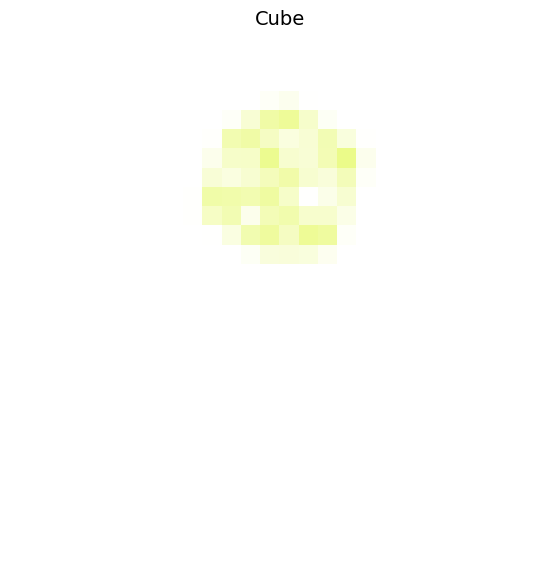

In [16]:
import random 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_permute = img.permute(1, 2, 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot 
plt.figure(figsize=(12, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [17]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

# test_dataloader = DataLoader(dataset=test_data,
#                              batch_size=BATCH_SIZE,
#                              num_workers=1,
#                              shuffle=False)

# train_dataloader, test_dataloader
train_dataloader

In [18]:
len(train_dataloader)

101

In [19]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 28, 28]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [20]:
resnet18_model.fc

Linear(in_features=512, out_features=1000, bias=True)

In [21]:
# Count the number of learnable parameters
total_params = sum(p.numel() for p in resnet18_model.parameters() if p.requires_grad)

print("Total number of learnable parameters:", total_params)

Total number of learnable parameters: 11689512


In [22]:

print(resnet18_model.fc.out_features) # -> print the out features of the resnet 18 model -> 1000 neuron
num_features = resnet18_model.fc.in_features # this is getting the 512 neurons
num_classes = 8
# now lets make an trainable mlp layer
resnet18_model.fc = nn.Sequential (
    nn.Linear(num_features,512),
    nn.Dropout(0.2),
     nn.Linear(512,256),
    nn.Linear(256,num_classes), # -> len(labels) labels according to labels
)

# we will take the fc layer after modification and print it out
resnet18_model.fc

1000


Sequential(
  (0): Linear(in_features=512, out_features=512, bias=True)
  (1): Dropout(p=0.2, inplace=False)
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Linear(in_features=256, out_features=8, bias=True)
)

Text(0.5, 1.0, 'circle')

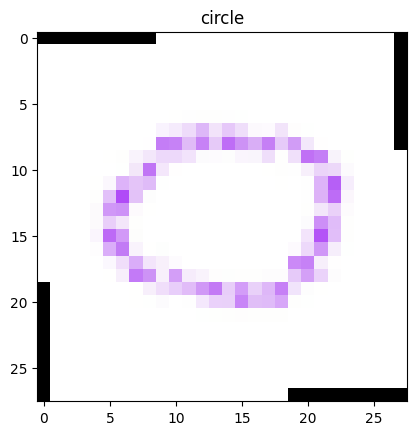

In [23]:
img, label = train_data[1500][0], train_data[1500][1]
img_permute = img.permute(1, 2, 0)

label_name = class_names[label]
image_per = img.permute(1,2,0)
image_per.shape
plt.imshow(image_per)
plt.title(label_name)

In [24]:
from torch.optim import lr_scheduler
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_model.parameters(), lr=1e-4)
optimizer = torch.optim.SGD(resnet18_model.parameters(), lr=0.01, momentum=0.9)


In [31]:
from tqdm.autonotebook import tqdm

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = 'cpu'):

    model.train()
    train_loss = 0
    train_acc = 0

    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        # 1. Forward pass
        y_pred = model(X)  # output model logits

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate accuracy metric
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)

    return train_loss  ,train_acc


In [34]:
# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5, 
          device=device):
  
  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
            }
  
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    # test_loss, test_acc = test_step(model=model,
    #                                 dataloader=test_dataloader,
    #                                 loss_fn=loss_fn,
    #                                 device=device)
    
    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    # results["test_loss"].append(test_loss)
    # results["test_acc"].append(test_acc)
  
  # 6. Return the filled results at the end of the epochs
  return results

In [35]:


epochs = 10
resnet18_model.to(device)

from timeit import default_timer as timer
start_time = timer() 

# Train model_0
resnet18 = train(model=resnet18_model,
                        train_dataloader=train_dataloader,
                        # test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=epochs)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 10%|█         | 1/10 [00:05<00:51,  5.75s/it]

Epoch: 0 | Train loss: 0.0866 | Train acc: 0.9548


 20%|██        | 2/10 [00:11<00:45,  5.64s/it]

Epoch: 1 | Train loss: 0.0894 | Train acc: 0.9560


 30%|███       | 3/10 [00:16<00:38,  5.56s/it]

Epoch: 2 | Train loss: 0.0717 | Train acc: 0.9690


 40%|████      | 4/10 [00:22<00:32,  5.50s/it]

Epoch: 3 | Train loss: 0.0480 | Train acc: 0.9773


 50%|█████     | 5/10 [00:27<00:27,  5.44s/it]

Epoch: 4 | Train loss: 0.0478 | Train acc: 0.9771


 60%|██████    | 6/10 [00:33<00:21,  5.48s/it]

Epoch: 5 | Train loss: 0.0515 | Train acc: 0.9761


 70%|███████   | 7/10 [00:38<00:16,  5.52s/it]

Epoch: 6 | Train loss: 0.0417 | Train acc: 0.9848


 80%|████████  | 8/10 [00:44<00:11,  5.53s/it]

Epoch: 7 | Train loss: 0.0418 | Train acc: 0.9836


 90%|█████████ | 9/10 [00:49<00:05,  5.46s/it]

Epoch: 8 | Train loss: 0.0364 | Train acc: 0.9855


100%|██████████| 10/10 [00:56<00:00,  5.67s/it]

Epoch: 9 | Train loss: 0.0378 | Train acc: 0.9861
Total training time: 56.719 seconds


In [36]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [38]:
# # Save the model's state dictionary
torch.save(resnet18_model.state_dict(), 'resnet18_pretrained-2.pth')